In [1]:
import wann2tb as wtb
#fermi是费米能，会被设定为能量零点
#dn是数据精度，读取的数据会被保留到小数点后dn位，建议dn=4
#seedname就是WANNIER90中的‘seedname’，在初始化对象时会读取seedname.win和seedname_hr.dat
#如果包含两种不同自旋分量，不同自旋分量的原子会被视作两个不同的原子
#目前仅支持vasp2wannier90的格式
WC=wtb.tb_h(fermi=8.2,dn=4,seedname="wannier90")
#初始化对象会输出投影轨道信息以及每个数字对应的原子

The projected orbitals of each atom:
{'W': ['s', 'pz', 'px', 'py', 'dz2', 'dxz', 'dyz', 'dxy', 'dx2y2'], 'C': ['pz', 'px', 'py']}
The number of the atoms:
[0, 'W', '↑']
[1, 'C', '↑']
[2, 'W', '↓']
[3, 'C', '↓']
Constructing the Hmatrix
The Hmatrix has been constructed


In [2]:
#直接显示自旋向上时C的轨道之间hopping的情况
#r1,r2,r3分别是三个方向上元胞之间hopping的考虑范围，[-1,1]表示最近邻，[-2,2]表示次近邻
#rr表示矩阵每行包含的原子
#cr表示矩阵每列包含的原子
#dn表示显示到小数点后dn位
#nm是数据截断值，小于nm的参数视为0，要不然显示太杂乱
WC.show_Hmatrix(r1=[-1,1],r2=[-1,1],r3=[-1,1],rr=[1],cr=[1],dn=1,nm=0.15)

Matrix([
[1.5,                                                                       0,                                                                      0],
[  0,                                                                     1.7, -0.2*exp(I*kx) - 0.2*exp(I*ky) + 0.2*exp(I*(kx + ky)) + 0.2*exp(-I*kx)],
[  0, 0.2*exp(I*kx) + 0.2*exp(I*(-kx - ky)) - 0.2*exp(-I*ky) - 0.2*exp(-I*kx),                                                                    1.6]])

In [3]:
#直接显示自旋向上时的紧束缚模型
#r1,r2,r3分别是三个方向上元胞之间hopping的考虑范围，[-1,1]表示最近邻，[-2,2]表示次近邻
#rr表示矩阵每行包含的原子
#cr表示矩阵每列包含的原子
#dn表示显示到小数点后dn位
#nm是数据截断值，小于nm的参数视为0，要不然显示太杂乱
WC.show_Hmatrix(r1=[-1,1],r2=[-1,1],r3=[-1,1],rr=[0,1],cr=[0,1],dn=1,nm=0.15)

Matrix([
[                                                                    -0.4*exp(I*kx) - 0.3*exp(I*ky) + 0.2*exp(I*kz) - 0.3*exp(I*(-kx - ky)) - 0.3*exp(I*(kx + ky)) + 7.7 + 0.2*exp(-I*kz) - 0.3*exp(-I*ky) - 0.4*exp(-I*kx),                                                                                                                                                                                 0.5*exp(I*kz) - 0.5*exp(-I*kz),                                                                                                                                                                                                                                                                                                                                                               1.0*exp(I*kx) - 1.0*exp(I*ky) + 1.0*exp(I*(kx + ky)) - 1.0*exp(-I*kx),                                                                                                                                              

In [4]:
kpath=[[0.5,0.0,0.0],[0.33333,0.33333,0.0],[0.0,0.0,0.0],[0.0,0.0,0.5]]
klabels=[r"$\mathrm{X}$",r"$\mathrm{K}$",r"$\mathrm{\Gamma}$",r"$\mathrm{A}$"]
#计算总能带，需要输入kpath和对应的klabels
#kn是每段路径上k点的数量
#R1r,R2r,R3r分别是三个方向上元胞之间hopping的考虑范围，[-1,1]表示最近邻，[-2,2]表示次近邻
#rr是模型中考虑的原子的列表和顺序，每个数字表示一个原子
#计算完成的能带数据存储在band中，band是一个列表，列表的元素分别为[kline,solution,kticks,klabels,wl]，其中klines是k点坐标列表，solution是一个二维列表，solution[i]是第i条能带的能量列表，kticks是高对称点位置，klabels是高对称点标签，wl是波函数信息
band=WC.band_cal(kpath=kpath,kn=50,klabels=klabels,R1r=[-2,2],R2r=[-2,2],R3r=[-2,2],rr=[0,1,2,3])

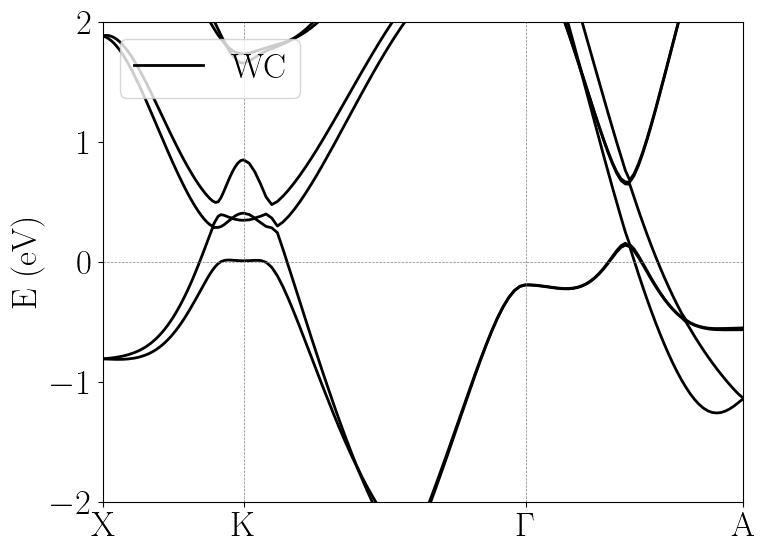

In [10]:
#可以使用band_plot画出好看的能带图，当然你也可以自己编写一个新的画图程序
#bandlist作为输入参数，可以放入多条能带一起作图。
#bandlist中的每一个元素具有如下格式[band,color,label,fatband,bandid,...]，不必要的元素可以不填，但是顺序不能乱
#如果设置了filename，就会在当前路径下保存图片（否则不保存），filename需要包含文件后缀
wtb.band_plot(bandlist=[[band,'black',r"$\mathrm{WC}$"]],ed=-2,eu=2,filename="wholeband.png")

In [13]:
#计算不同自旋分量的能带，你甚至可以计算单原子的能带，但是没有物理意义
band_up=WC.band_cal(kpath=kpath,kn=50,klabels=klabels,R1r=[-2,2],R2r=[-2,2],R3r=[-2,2],rr=[0,1])
band_dn=WC.band_cal(kpath=kpath,kn=50,klabels=klabels,R1r=[-2,2],R2r=[-2,2],R3r=[-2,2],rr=[2,3])

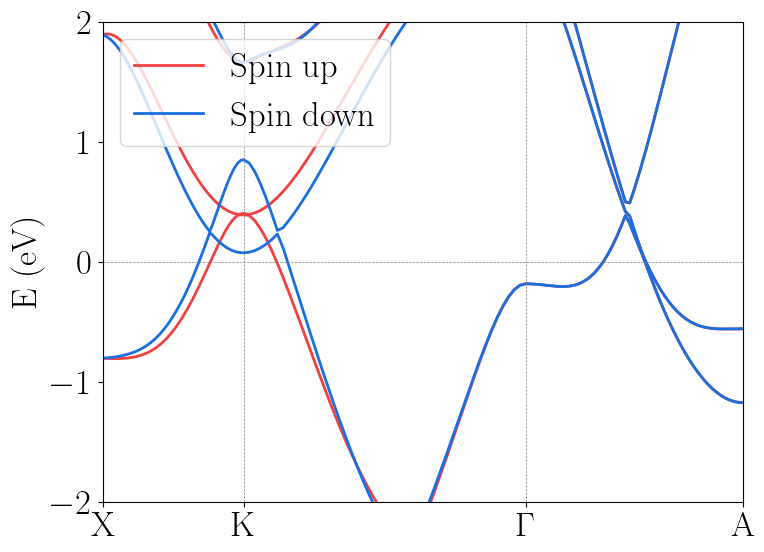

In [11]:
wtb.band_plot(bandlist=[[band_up,wtb.red,"Spin up"],[band_dn,wtb.blue,"Spin down"]],ed=-2,eu=2,filename="spinband.png")

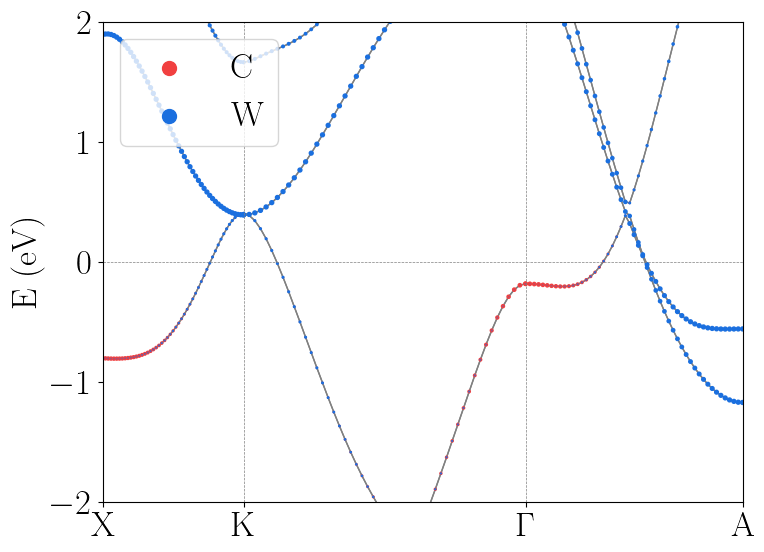

In [12]:
#可以使用band_plot画出fatband，这里画出自旋向上时，W和C的轨道的权重
#fatband=[0,0,0,0,0,0,0,0,0,1,1,1]是一个向量，必须与哈密顿量同维度。这里前9个0表示W的9个轨道不考虑，后面3个1表示考虑C的3个p轨道。
wtb.band_plot(bandlist=[[band_up,wtb.red,r"$\mathrm{C}$",[0,0,0,0,0,0,0,0,0,1,1,1]],[band_up,wtb.blue,r"$\mathrm{W}$",[1,1,1,1,1,1,1,1,1,0,0,0]]],ed=-2,eu=2,filename="fatband.png")